<a href="https://colab.research.google.com/github/yuki2023-kenkyu/Numerical_Computation_Seminar/blob/main/answers/%E5%BE%AE%E5%88%86%E6%96%B9%E7%A8%8B%E5%BC%8F%E3%81%AE%E6%95%B0%E5%80%A4%E8%A7%A3%E6%B3%95_1/answer%5B1%5D_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 解析解の導出
___

ポイント：変数分離法を利用する．

※空気抵抗を受ける物体の自由落下運動

$$
\begin{eqnarray}
  M\;\frac{dv}{dt} &=& Mg-kv\quad i.e. \quad \frac{dv}{dt} = g-\frac{k}{M} v\\
\end{eqnarray}
$$

変数分離して，両辺を積分すると

$$
\begin{eqnarray}
  \int \frac{dv}{g-\frac{k}{M} v} &=& \int dt\\
  -\frac{M}{k}\;\log{|g-\frac{k}{M}v|} &=& t+c\\
  \log{|g-\frac{k}{M}v|} &=& -\frac{k}{M}(t+c)\\
  g-\frac{k}{M}v &=& \pm e^{-\frac{k}{M}(t+c)}=\pm e^{-\frac{k}{M}t}e^{-\frac{k}{M}c}\\
\end{eqnarray}
$$

ここで，$\pm e^{-\frac{k}{M}(t+c)}=\frac{k}{M}\;C$ とおくと

$$
\begin{eqnarray}
  g-\frac{k}{M}v &=& \frac{k}{M}C\cdot e^{-\frac{k}{M}t}\\
  \frac{k}{M}v &=& g-\frac{k}{M}C\cdot e^{-\frac{k}{M}t}\\
  v &=& \frac{Mg}{k} - C\cdot e^{-\frac{k}{M}t}\\
\end{eqnarray}
$$
初期条件「$t_0=0$ のとき $v_0=0$」より，$C=\frac{Mg}{k}$


したがって，求める解析解は

$$\therefore v = \frac{Mg}{k}\;(1 - e^{-\frac{k}{M}t})$$

# 演習問題 [1] (4) の解答
___

<Figure size 640x480 with 0 Axes>

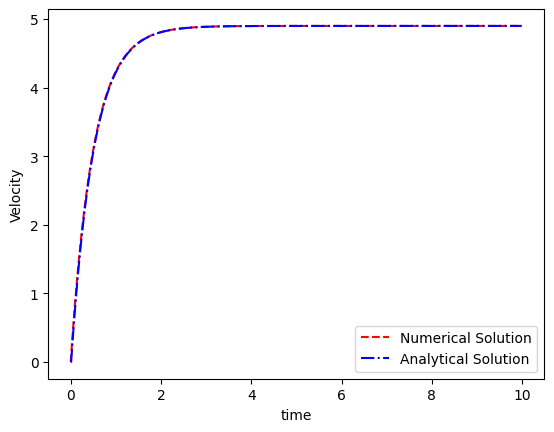

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# １階微分方程式
def f(t, v):
  return g - k/M * v
# 解析解
def a(t1, v1):
  C = M*g /k
  return C * (1-np.exp(-k/M *t1))

# 初期条件
M = 1
k = 2
g = 9.8
t_0 = 0
v_0 = 0
tmax = 10

# 刻み幅の設定
m = 2**10
h = (tmax - t_0) /m

# 変域の設定
tpoints = np.arange(t_0, tmax, h)
t1points = np.arange(t_0, tmax, h)
# 計算結果を保存する配列の用意
vpoints = []
v1points = []

# 初期値の代入
v = v_0
v1 = v_0
# 数値積分
for t in tpoints:
    # 配列に要素を追加
    vpoints.append(v)
    # ルンゲ・クッタ法のアルゴリズム
    k1 = h * f(t, v)
    k2 = h * f(t+h/2, v+k1/2)
    k3 = h * f(t+h/2, v+k2/2)
    k4 = h * f(t+h, v+k3)
    v += (k1+2*k2+2*k3+k4)/6

# 解析解
for t1 in t1points:
    v1points.append(v1)
    v1 = a(t1, v1)

# グラフ用の各種設定
fig = plt.figure()
# グラフの背景色の設定
fig, ax = plt.subplots(facecolor = 'white')

ax.plot(tpoints, vpoints, '--', label = 'Numerical Solution', color = 'red')
ax.plot(t1points, v1points, '-.', label = 'Analytical Solution', color = 'blue')
plt.xlabel('time')
plt.ylabel('Velocity')
plt.legend(loc = 'best')